In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
data = pd.read_csv('goodCalibration/2017-05-29_22-59-27_with_temp.csv')
datawona = data.dropna()
temp_peak = datawona['temp'].argmax()
rising = datawona.iloc[:temp_peak+1, :]
falling = datawona.iloc[temp_peak:, :]

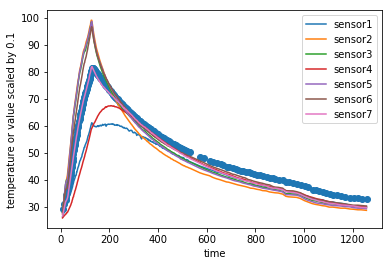

In [53]:
plt.scatter(datawona[['time']], datawona[['temp']])
for header in datawona.columns:
    if 'sensor' in header:
        plt.plot(datawona[[header]]*0.1, label=header)
ax = plt.gca()
ax.set(xlabel='time', ylabel='temperature or value scaled by 0.1')
ax.legend()


In [7]:
from scipy.optimize import curve_fit

In [63]:
def func1(x, a, b, c, d, e, f):
    return a * x**2 + b*x + c + d * np.sin( e*x + f)
def func2(x, a, b, c, d):
    return a * x**2 + b*x + c + d
def func3(x, a, b, c, d):
    return  a + b*x + c * np.exp(d*x)


funcs = [func1, func2]

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

index = 0
index2 = 0
for dat in [rwona, fwona]:
    func = func3
    for header in dat.columns:
        if 'sensor' in header:
            xdata = dat[header]
            ydata = dat['temp']

            popt, pcov = curve_fit(func, xdata, ydata, bounds=(-5,5))
            ypdata = func(xdata, *popt)

            ax = plt.subplot2grid((4,8), (int(index/4)*2, int(index%4)+index2*4))
            ax.plot(xdata, ypdata, 'r-', label='fit')
            ax.plot(xdata, ydata, color='b')

            ax = plt.subplot2grid((4,8), (int(index/4)*2+1, int(index%4)+index2*4))
            ax.plot(xdata, (ydata-ypdata) )

            index += 1
    index2 += 1
    index = 0

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.